# Customer Churn


##### This notebook contains the EDA for project Churn Analysis

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model


### Data Collection
- Dataset Source - https://www.kaggle.com/datasets/undersc0re/predict-the-churn-risk-rate
- The data consists of 23 column and 36992 rows.

### Table of Contents


1) Problem Statement


2) Data Dictionary


3) Import Libraries


4) Exploratory Data Analysis

    4.1 - Data Dimension

    4.2 - Data Checks 
    
        - Check Missing values
        - Check Duplicates
        - Check number of unique values of each column
        - Check statistics of data 
        - Check data type of all features
        - Check different Numerical/Catagorical feaures
        - Check various categories present in different categorical column
        - Check Correlation 

    4.3 - Data Distribution

        - Data Distribution(Features)
        - Data Distribution(Target)
        
5) Outliers

### 1) Problem statement

- Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Understanding and detecting churn is the first step to retaining these customers and improving the company’s offerings.


- Goal is to predict the churn for a website based on the features provided in the dataset. Customer will EXIT(1) or NOT(0), and identify customers who are likely to leave so that we can retain then with some special offers on membership.





### 2. Data Dictionary 

1) age : Represents the age of a customer

2) gender : Represents the gender of a customer

3) security_no : Represents a unique security number that is used to identify a person

4) region_category : Represents the region that a customer belongs to

5) membership_category : Represents the category of the membership that a customer is using

6) joining_date : Represents the date when a customer became a member

7) joined_through_referral : Represents whether a customer joined using any referral code or ID

8) referral_id : Represents a referral ID

9) preferred_offer_types : Represents the type of offer that a customer prefers

10) medium_of_operation : Represents the medium of operation that a customer uses for transactions

11) internet_option : Represents the type of internet service a customer uses

12) last_visit_time : Represents the last time a customer visited the website

13) days_since_last_login : Represents the no. of days since a customer last logged into the website

14) avg_time_spent : Represents the average time spent by a customer on the website

15) avg_transaction_value : Represents the average transaction value of a customer

16) avg_frequency_login_days : Represents the no. of times a customer has logged in to the website

17) points_in_wallet : Represents the points awarded to a customer on each transaction

18) used_special_discount : Represents whether a customer uses special discounts offered

19) offer_application_preference : Represents whether a customer prefers offers

20) past_complaint : Represents whether a customer has raised any complaints

21) complaint_status : Represents whether the complaints raised by a customer was resolved

22) feedback : Represents the feedback provided by a customer

23) churn_risk_score : 0 or 1 [Customer will Stay or Exit]

### 3. Import Data and Required Packages
#####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('churn.csv', index_col=0)

### 4. Exploratory Data Analysis

##### Show Top 5 Records

In [4]:
df.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


#### 4.1 Shape of the Dataset

In [5]:
print(f'There are {df.shape[0]} data points and {df.shape[1]} features in the dataset')

There are 36992 data points and 23 features in the dataset


###  4.2 Data Checks 

- Check Missing values
- Check Duplicates
- Check number of unique values of each column
- Check statistics of data 
- Check data type of all features
- Check different Numerical/Catagorical feaures
- Check various categories present in the different categorical column
- Check Correlation 


#### 4.2.1 Check Missing values

In [6]:
df.isna().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

##### There are no missing values in the data set

#### 4.2.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

##### There are no duplicates  values in the data set

### 4.2.3 Checking the number of unique values of each column

In [8]:
df.nunique()

age                                55
gender                              3
security_no                     36992
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11359
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  25961
avg_transaction_value           36894
avg_frequency_login_days         1654
points_in_wallet                23699
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

### 4.2.4 Check statistics of data set

In [9]:
df.describe(include=np.number)

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


1) Average age of customers who is likely to exit is 37

2) On average customers have around 680 point in wallet

3) Maximum no. of days since a customer logged in is 26

In [10]:
df.describe(include='object')

,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,3,36992,3,6,1096,3,11359,3,4,3,30101,1654,2,2,2,5,9
top,F,XW0DQ7H,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350


1) Mostly customers are Females belongs to Town

2) Most customers uses Desktop to access website over wi-fi

3) Most of the customers have Basic Membership of the service

### 4.2.5 Check data types

In [11]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

### 4.2.6 Check different Numerical/Catagorical feaures

In [12]:
### Numerical Variables
# list/number of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
# visualise the numerical variables
df[numerical_features].head()

We have 6 numerical features : ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']


,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.75,0
1,32,16,306.34,12838.38,NaN,0
2,44,14,516.16,21027.00,500.69,1
3,37,11,53.27,25239.56,567.66,1
4,31,20,113.13,24483.66,663.06,1


In [13]:
### Categorical Variables
# list/number of categorical variables
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

# visualise the numerical variables
df[categorical_features].head()

We have 17 categorical features : ['gender', 'security_no', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'avg_frequency_login_days', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17.0,Yes,Yes,No,Not Applicable,Products always in Stock
1,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,10.0,Yes,No,Yes,Solved,Quality Customer Care
2,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,22.0,No,Yes,Yes,Solved in Follow-up,Poor Website
3,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,6.0,No,Yes,Yes,Unsolved,Poor Website
4,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,16.0,No,Yes,Yes,Solved,Poor Website


### 4.2.7 Check various categories present in the different Categorical features

In [14]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))
    print(df[feature].unique())


The feature is gender and number of categories are 3
['F' 'M' 'Unknown']
The feature is security_no and number of categories are 36992
['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
The feature is region_category and number of categories are 4
['Village' 'City' 'Town' nan]
The feature is membership_category and number of categories are 6
['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
The feature is joining_date and number of categories are 1096
['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']
The feature is joined_through_referral and number of categories are 3
['No' '?' 'Yes']
The feature is referral_id and number of categories are 11359
['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
The feature is preferred_offer_types and number of categories are 4
['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
The feature 

### 4.4.8 Correlation 

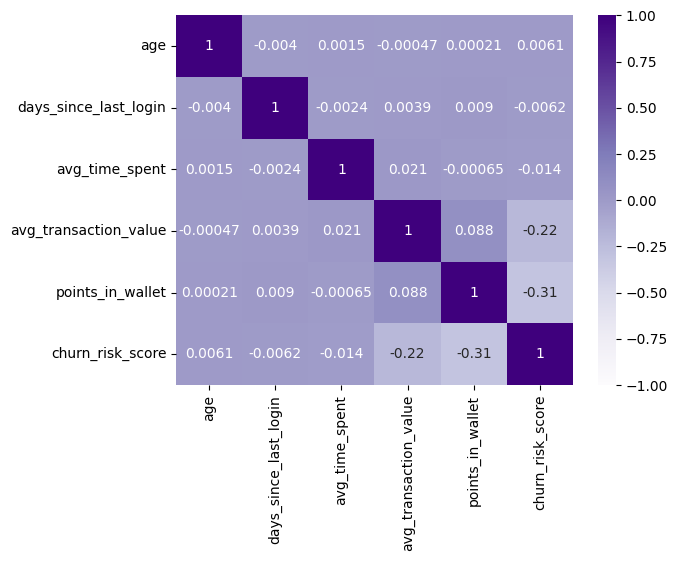

In [15]:
sns.heatmap(df.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

1) There isn't high correlation between independent features and customer chrun

2) Maximum -ve correlation between point in wallet and customer chrun is -0.31

### 4.5 Data Distribution 

#### 4.5.1 Data Distribution of Features

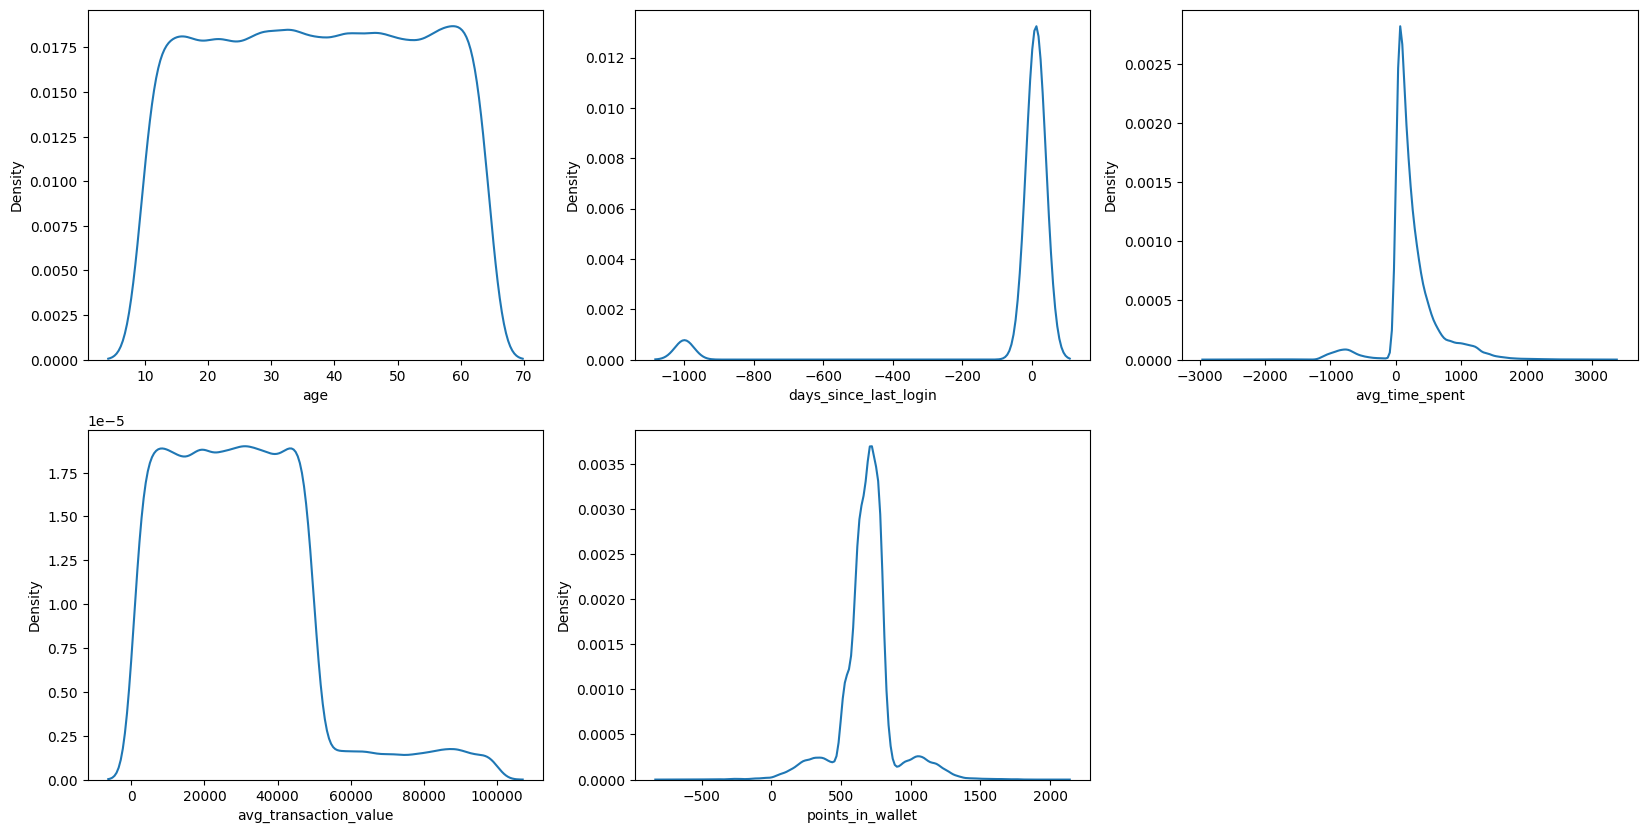

In [16]:
df_num=df.drop('churn_risk_score', axis=1).select_dtypes(include=[np.number]) 
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(20,10)) 
for variable, subplot in zip(df_num.columns,ax.flatten()):
    z = sns.kdeplot(x = df_num[variable] , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)

fig.delaxes(ax[1][2])
plt.show()

In [17]:
df_num.skew()

age                     -0.007319
days_since_last_login   -3.941356
avg_time_spent           0.539624
avg_transaction_value    1.011027
points_in_wallet        -0.080309
dtype: float64

1) As we can see from plot independent feature days_since_last_login is highly left skewed

2) Features such as age and points_in_wallet are moderately left skewed

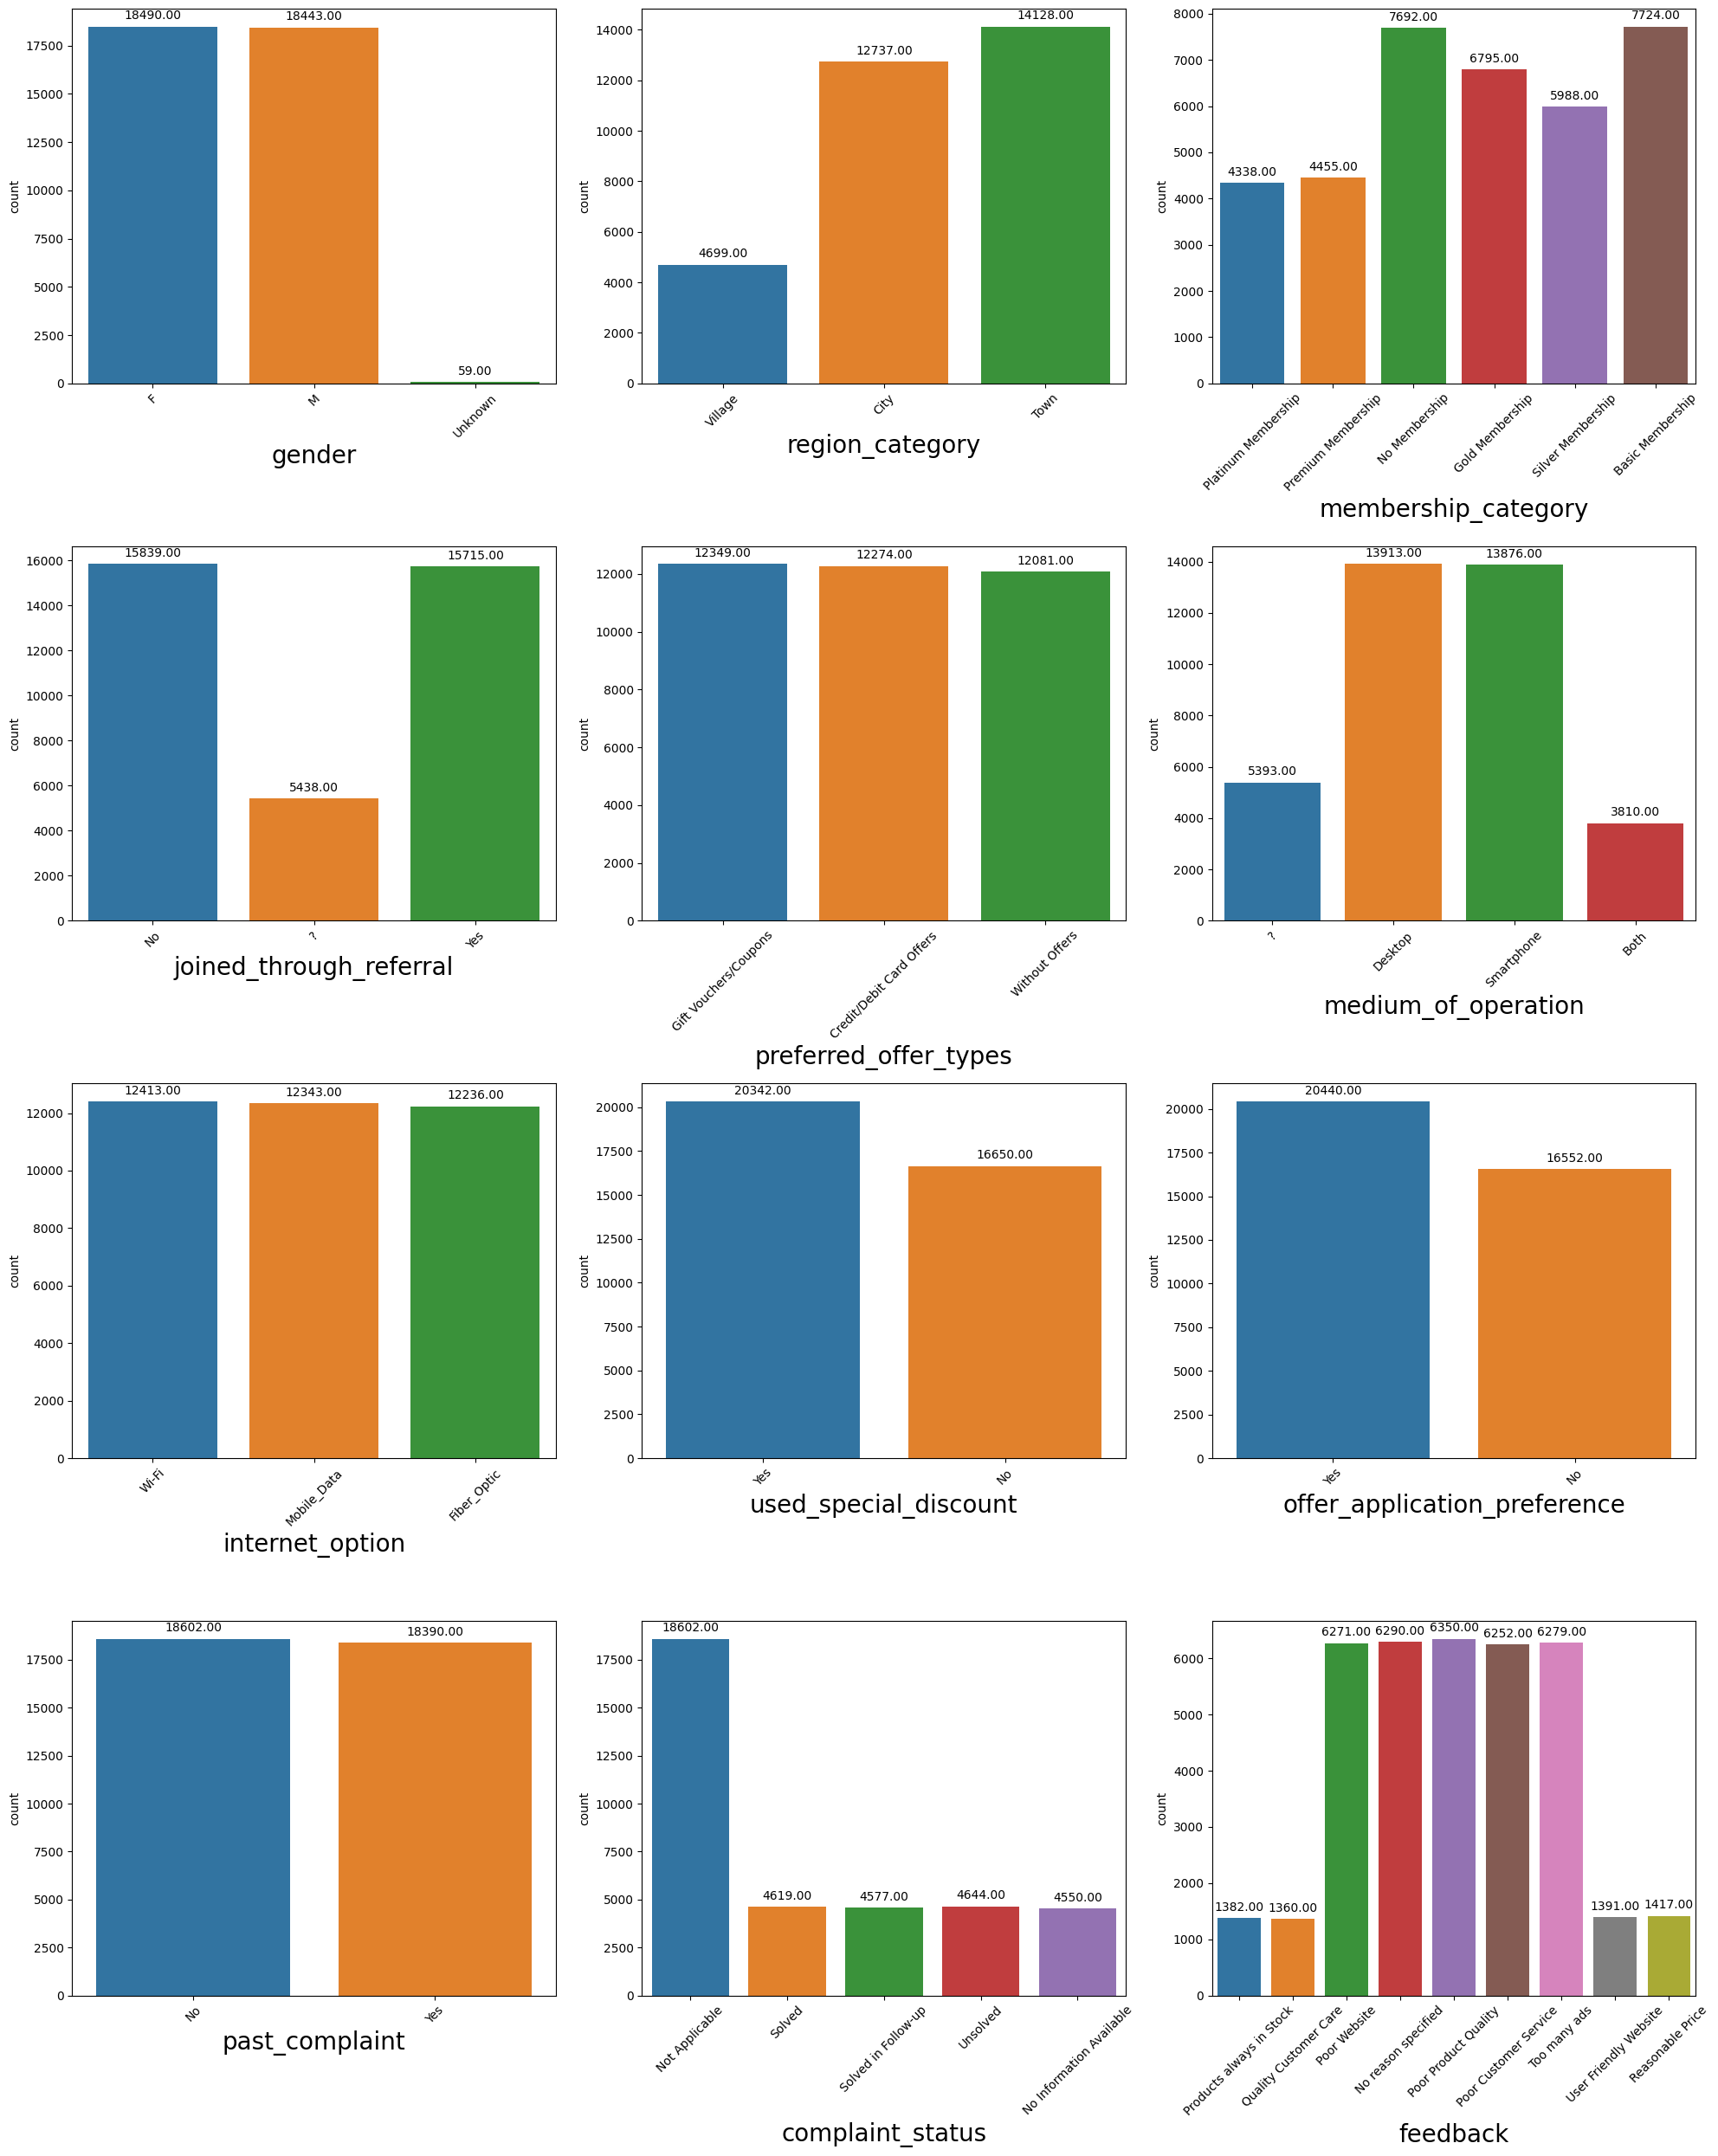

In [18]:
df_cat = df.drop(['referral_id','last_visit_time','avg_frequency_login_days','security_no','joining_date'], axis=1).select_dtypes(include='object')
fig,ax= plt.subplots(nrows=4,ncols=3,figsize=(20, 25)) 
for variable, subplot in zip(df_cat.columns,ax.flatten()):
    z = sns.countplot(x = df_cat[variable],ax=subplot, ) 
    z.set_xlabel(variable, fontsize = 20)
    z.set_xticklabels(z.get_xticklabels(),rotation=45)
    for p in z.patches:
      z.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')
    
plt.tight_layout()

1) As we can see both genders, Male and Female are equally distributed and there is some noise which will be handled in Section 5.1.2

2) Most of the customers are from town region while least number of customer belongs to village whcih is ~4600.

3) No & Basic category are leading one in membership_category while premium & platinum are least subscribed which is around ~4300+

4) Around 15K customers have joined through referral program

5) Most of the customers either use Desktop or Smartphone to access website

6) Most of the customers has given negative feedback about the service such as poor website, poor customer service etc.

#### 4.5.2 Data Distribution of Target

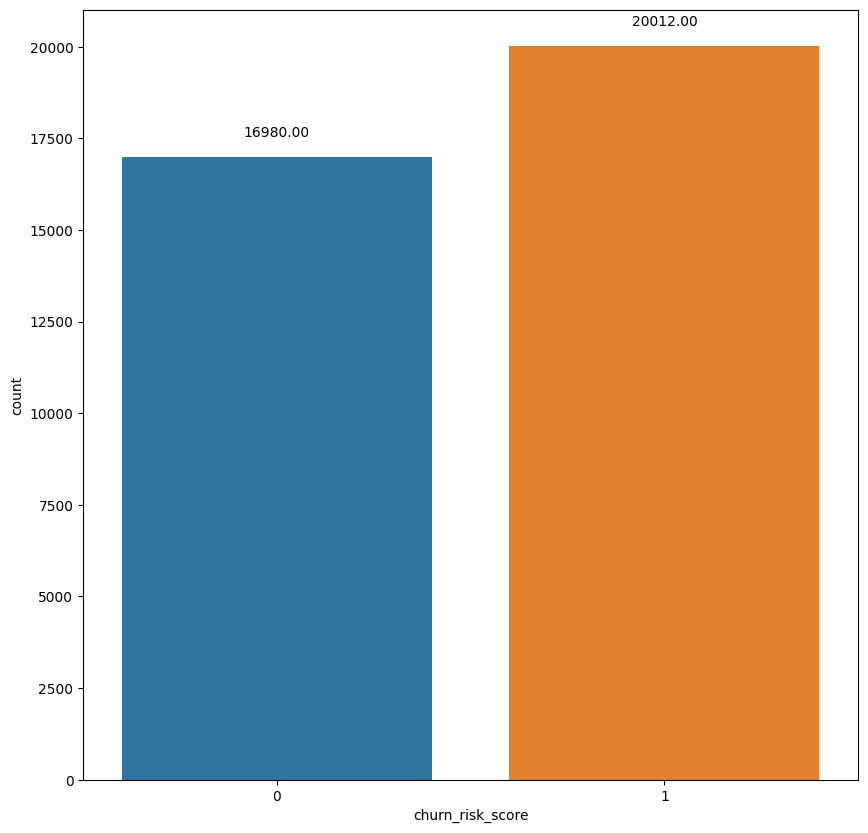

In [19]:
plt.rcParams['figure.figsize'] = [10,10] 
ax = sns.countplot(df['churn_risk_score'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')
plt.show() 

Target feature churn_risk_score's classes Custimer will Exit (1) and Customer wont exit (0) are kind of equally distributed by 5:4 ratio.

## 5) Outliers 

In [21]:
df_num=df.select_dtypes(include=[np.number]) 
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1 

outlier = pd.DataFrame((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print(f'Total number of Outliers in column {i} are {len(outlier[outlier[i] == True][i])}')

Total number of Outliers in column age are 0
Total number of Outliers in column days_since_last_login are 1999
Total number of Outliers in column avg_time_spent are 4677
Total number of Outliers in column avg_transaction_value are 1131
Total number of Outliers in column points_in_wallet are 4367
Total number of Outliers in column churn_risk_score are 0


### Visualizing outliers using Boxplots

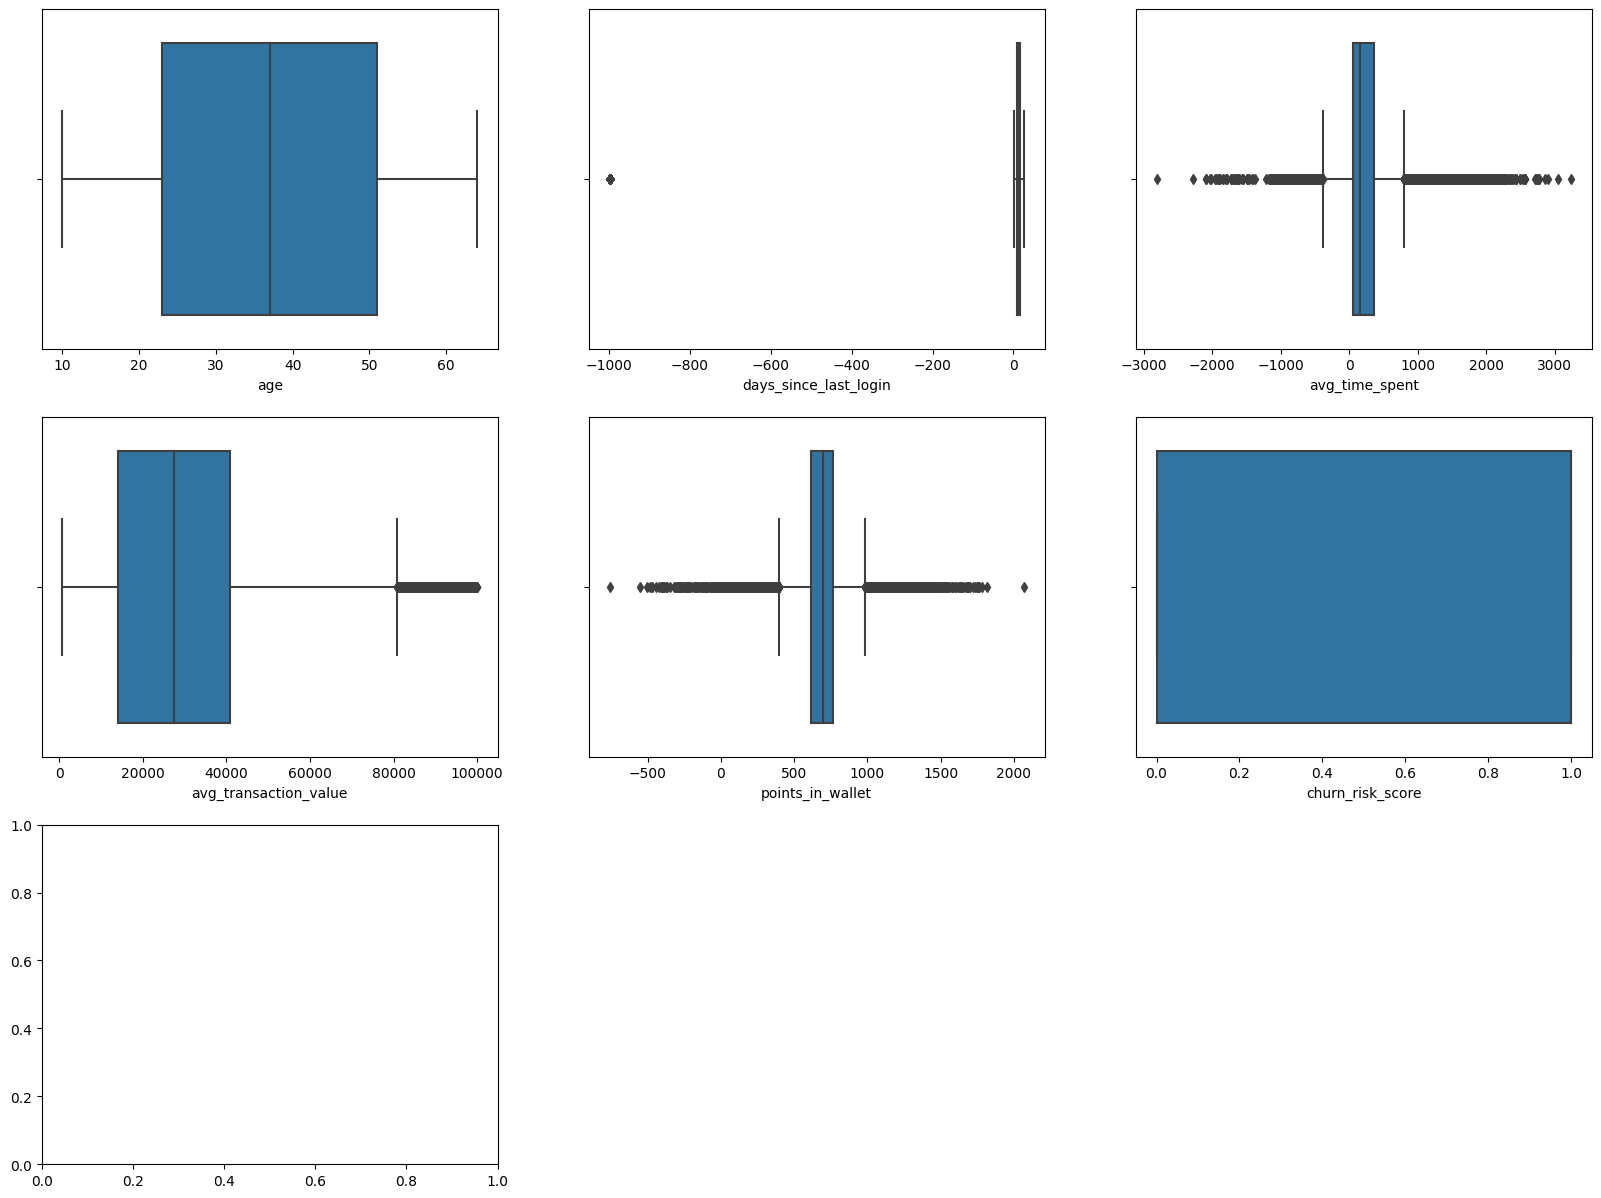

In [22]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(20, 15)) 
for variable, subplot in zip(df_num.columns,ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)
    
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
plt.show()

1) Features such as age, churn_risk_score have no outliers

2) points in wallet and avg frequency login days are having outliers in large numbers